In [1]:
# Import libraries and packages
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read files
customers = pd.read_csv('QVI_purchase_behaviour.csv')
transactions = pd.read_excel('QVI_transaction_data.xlsx')

EXPLORE TRANSACTION DATA

In [3]:
t_df = transactions.copy()
t_df.info()
t_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [4]:
# Change DATE into datetime type
t_df['DATE'] = pd.to_datetime(t_df['DATE'],unit='D',origin='1899-12-30')
print(t_df['DATE'].dtype)
t_df.head()

# Show all the unique product names
t_df['PROD_NAME'].unique()

datetime64[ns]


array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

In [5]:
# Remove special characters, lowercase words and count word frequency
product_name = t_df['PROD_NAME'].str.replace(r'[0-9]+[gG]','').str.replace(r'[^a-zA-Z]',' ', regex=True).str.lower()
# Function to count words
my_dict = {}
def word_count(sentence): 
    for word in sentence.split(' '):
        if word not in my_dict:
            my_dict[word] = 0
        else:
            my_dict[word] += 1
    return my_dict

C:\Users\duong\AppData\Local\Temp\ipykernel_9760\3853869524.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  product_name = t_df['PROD_NAME'].str.replace(r'[0-9]+[gG]','').str.replace(r'[^a-zA-Z]',' ', regex=True).str.lower()


In [6]:
# Call the count word function
product_name.apply(word_count)
prod = pd.Series(my_dict).sort_values(ascending=False)
prod.head(20)

            839803
chips        49769
kettle       41287
smiths       28859
salt         27975
cheese       27889
pringles     25101
doritos      24961
crinkle      23959
corn         22062
original     21559
cut          20753
chip         18644
chicken      18576
salsa        18093
cream        16925
chilli       15389
sea          14144
thins        14074
sour         13881
dtype: int64

In [7]:
# Not only chips shown in this column, there are "salsas" too. We want to eliminate those entries
t_df = t_df[t_df['PROD_NAME'].str.contains(r'[Ss]alsa') == False]
t_df.info()
t_df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246742 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            246742 non-null  datetime64[ns]
 1   STORE_NBR       246742 non-null  int64         
 2   LYLTY_CARD_NBR  246742 non-null  int64         
 3   TXN_ID          246742 non-null  int64         
 4   PROD_NBR        246742 non-null  int64         
 5   PROD_NAME       246742 non-null  object        
 6   PROD_QTY        246742 non-null  int64         
 7   TOT_SALES       246742 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.9+ MB


,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
std,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [8]:
# There is at least 1 order with 200 packets (MAX) according to column PROD_QTY in the description
max_packets = t_df[t_df['PROD_QTY'] == 200]
max_packets

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [9]:
# It's the same customer LYLTY_CARD_NBR 226000, do they have more orders?
c_226000 = t_df[t_df['LYLTY_CARD_NBR'] == 226000]
c_226000

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [10]:
# No they don't have any other order and this type of order is very unique (probably for commercial uses) so we can drop this outlier
t_df = t_df[t_df['LYLTY_CARD_NBR'] != 226000]
t_df.info()
t_df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246740 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            246740 non-null  datetime64[ns]
 1   STORE_NBR       246740 non-null  int64         
 2   LYLTY_CARD_NBR  246740 non-null  int64         
 3   TXN_ID          246740 non-null  int64         
 4   PROD_NBR        246740 non-null  int64         
 5   PROD_NAME       246740 non-null  object        
 6   PROD_QTY        246740 non-null  int64         
 7   TOT_SALES       246740 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.9+ MB


,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000
mean,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113
std,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


In [11]:
# Our data looks more reasonable. 
# Now, let's look at the number of transaction lines over time to see if there are any obvious data issues such as missing data
print(t_df['DATE'].value_counts().shape)
print(t_df['DATE'].max())
print(t_df['DATE'].min())

(364,)
2019-06-30 00:00:00
2018-07-01 00:00:00


In [12]:
# Only 364 out of 365 days available, now I'm looking for the missing date. 
# Create a new dataframe from min date to max date and find the differences btw our dates and corrected dates
date_available = t_df['DATE'].value_counts().reset_index()
full_year = pd.date_range(start='2018-07-01', end='2019-06-30')
full_year.difference(date_available['index']) 

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

<Axes: xlabel='DATE', ylabel='TOT_SALES'>

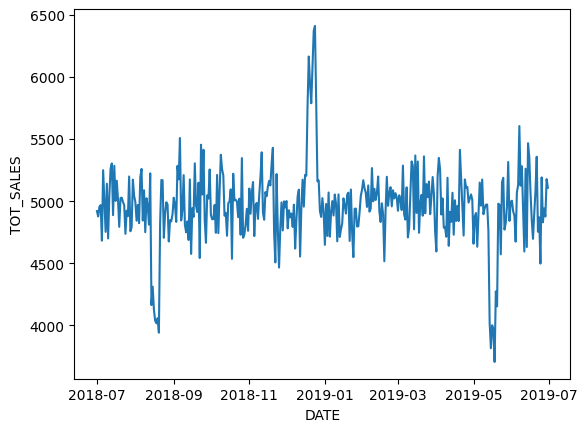

In [13]:
# The missing date is '2018-12-25' and it is Christmas day so it makes sense there are no order on that day
# Let's see how the sales over our timeline
sns.lineplot(data=t_df.groupby('DATE')['TOT_SALES'].sum().reset_index(), x='DATE', y='TOT_SALES')

- From the above graph, we can see a spike in sales in December up to Christmas and 2 very low drops in August and June. 

In [14]:
# Look like we got rid of all of the outliers, now we will focus on creating pack sizes and categorizing them into brands
# Pack sizes:
t_df['PACK_SIZE'] = t_df['PROD_NAME'].str.extract(r'(\d+)').astype('int')
t_df['PACK_SIZE'].unique()

array([175, 170, 150, 330, 210, 270, 220, 125, 110, 134, 380, 180, 165,
       135, 250, 200, 160, 190,  90,  70])

Text(0, 0.5, 'Product Quantity [packet]')

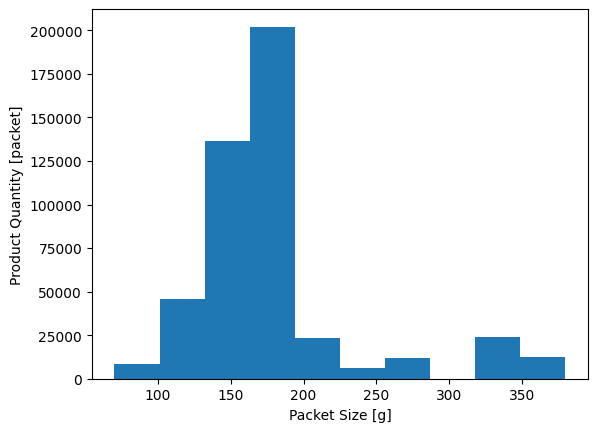

In [15]:
# Plot a histogram to show how much sales for each pack sizes
plt.hist(t_df['PACK_SIZE'], weights = t_df['PROD_QTY'])
plt.xlabel('Packet Size [g]')
plt.ylabel('Product Quantity [packet]')

In [16]:
# Create brand name by using the first word of column PROD_NAME
t_df['BRAND_NAME'] = t_df['PROD_NAME'].str.split().str.get(0)
t_df['BRAND_NAME'].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'French', 'RRD', 'Tostitos', 'Cheetos',
       'Woolworths', 'Snbts', 'Sunbites'], dtype=object)

- Combine similar brands into 1 correct one: 
    'Infzns'='Infuzions','RRD'='Red'='Red Rock Deli','Dorito'='Doritos','Snbts'='Sunbites','WW'='Woolworths' 'NCC'='Natural'='Natural Chip Co','Smith'='Smiths','GrnWves'='Grain'='Grain Waves'

In [17]:
# Create function to combine these brands
def correct_brand(row):
    if row =='Infzns':
        return 'Infuzions'
    elif row =='RRD' or row =='Red':
        return 'Red Rock Deli'
    elif row =='Dorito':
        return 'Doritos'
    elif row =='Snbts':
        return 'Sunbites'
    elif row =='WW':
        return 'Woolworths'
    elif row =='NCC' or row =='Natural':
        return 'Natural Chip Co'
    elif row =='Smith':
        return 'Smiths'
    elif row =='GrnWves' or row =='Grain':
        return 'Grain Waves'
    else:
        return row
    
t_df['BRAND_NAME'] = t_df['BRAND_NAME'].apply(correct_brand)
t_df['BRAND_NAME'].unique()
    

array(['Natural Chip Co', 'CCs', 'Smiths', 'Kettle', 'Grain Waves',
       'Doritos', 'Twisties', 'Woolworths', 'Thins', 'Burger', 'Cheezels',
       'Infuzions', 'Red Rock Deli', 'Pringles', 'Tyrrells', 'Cobs',
       'French', 'Tostitos', 'Cheetos', 'Sunbites'], dtype=object)

In [18]:
# Let's look at our transaction dataframe again
t_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND_NAME
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural Chip Co
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle
...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175,Kettle
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175,Tostitos
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170,Doritos
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150,Doritos


EXPLORE CUSTOMER DATA

In [19]:
# Create a copy of customer data
c_df = customers.copy()
c_df.info()
c_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [20]:
# Check for Nulls and duplicates
c_df.isna().sum()
c_df.duplicated().sum()
c_df['LYLTY_CARD_NBR'].duplicated().sum()

0

In [21]:
# Check for abnormalities
print(c_df['PREMIUM_CUSTOMER'].unique())
print(c_df['LIFESTAGE'].unique())

['Premium' 'Mainstream' 'Budget']
['YOUNG SINGLES/COUPLES' 'YOUNG FAMILIES' 'OLDER SINGLES/COUPLES'
 'MIDAGE SINGLES/COUPLES' 'NEW FAMILIES' 'OLDER FAMILIES' 'RETIREES']


In [22]:
# Since we don't have any Nulls, duplicates or abnormalities, we can merge 2 dataframes
df = c_df.merge(t_df, how='left',on='LYLTY_CARD_NBR')
df

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND_NAME
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1.0,1.0,5.0,Natural Chip Compny SeaSalt175g,2.0,6.0,175.0,Natural Chip Co
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16,1.0,2.0,58.0,Red Rock Deli Chikn&Garlic Aioli 150g,1.0,2.7,150.0,Red Rock Deli
2,1003,YOUNG FAMILIES,Budget,2019-03-07,1.0,3.0,52.0,Grain Waves Sour Cream&Chives 210G,1.0,3.6,210.0,Grain Waves
3,1003,YOUNG FAMILIES,Budget,2019-03-08,1.0,4.0,106.0,Natural ChipCo Hony Soy Chckn175g,1.0,3.0,175.0,Natural Chip Co
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,1.0,5.0,96.0,WW Original Stacked Chips 160g,1.0,1.9,160.0,Woolworths
...,...,...,...,...,...,...,...,...,...,...,...,...
248085,2370651,MIDAGE SINGLES/COUPLES,Mainstream,2018-08-03,88.0,240350.0,4.0,Dorito Corn Chp Supreme 380g,2.0,13.0,380.0,Doritos
248086,2370701,YOUNG FAMILIES,Mainstream,2018-12-08,88.0,240378.0,24.0,Grain Waves Sweet Chilli 210g,2.0,7.2,210.0,Grain Waves
248087,2370751,YOUNG FAMILIES,Premium,2018-10-01,88.0,240394.0,60.0,Kettle Tortilla ChpsFeta&Garlic 150g,2.0,9.2,150.0,Kettle
248088,2370961,OLDER FAMILIES,Budget,2018-10-24,88.0,240480.0,70.0,Tyrrells Crisps Lightly Salted 165g,2.0,8.4,165.0,Tyrrells


In [23]:
# Check for nulls
df.isna().sum()

LYLTY_CARD_NBR         0
LIFESTAGE              0
PREMIUM_CUSTOMER       0
DATE                1350
STORE_NBR           1350
TXN_ID              1350
PROD_NBR            1350
PROD_NAME           1350
PROD_QTY            1350
TOT_SALES           1350
PACK_SIZE           1350
BRAND_NAME          1350
dtype: int64

In [24]:
# Drop null values
df.dropna(inplace=True)
df.isna().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
DATE                0
STORE_NBR           0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND_NAME          0
dtype: int64

In [25]:
# Double check again and sort by LYLTY_CARD_NBR and DATE
df.sort_values(by=['LYLTY_CARD_NBR','DATE'], inplace=True)
df

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND_NAME
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1.0,1.0,5.0,Natural Chip Compny SeaSalt175g,2.0,6.0,175.0,Natural Chip Co
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16,1.0,2.0,58.0,Red Rock Deli Chikn&Garlic Aioli 150g,1.0,2.7,150.0,Red Rock Deli
2,1003,YOUNG FAMILIES,Budget,2019-03-07,1.0,3.0,52.0,Grain Waves Sour Cream&Chives 210G,1.0,3.6,210.0,Grain Waves
3,1003,YOUNG FAMILIES,Budget,2019-03-08,1.0,4.0,106.0,Natural ChipCo Hony Soy Chckn175g,1.0,3.0,175.0,Natural Chip Co
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,1.0,5.0,96.0,WW Original Stacked Chips 160g,1.0,1.9,160.0,Woolworths
...,...,...,...,...,...,...,...,...,...,...,...,...
248085,2370651,MIDAGE SINGLES/COUPLES,Mainstream,2018-08-03,88.0,240350.0,4.0,Dorito Corn Chp Supreme 380g,2.0,13.0,380.0,Doritos
248086,2370701,YOUNG FAMILIES,Mainstream,2018-12-08,88.0,240378.0,24.0,Grain Waves Sweet Chilli 210g,2.0,7.2,210.0,Grain Waves
248087,2370751,YOUNG FAMILIES,Premium,2018-10-01,88.0,240394.0,60.0,Kettle Tortilla ChpsFeta&Garlic 150g,2.0,9.2,150.0,Kettle
248088,2370961,OLDER FAMILIES,Budget,2018-10-24,88.0,240480.0,70.0,Tyrrells Crisps Lightly Salted 165g,2.0,8.4,165.0,Tyrrells


In [26]:
# Save our dataframe
df.to_csv('QVI_Data.csv')

DATA ANALYSIS ON CUSTOMER SEGMENTS

Now that the data is ready for analysis, we can define some metrics of interest to
the client:
- Who spends the most on chips (total sales), describing customers by lifestage and
how premium their general purchasing behaviour is
- How many customers are in each segment
- How many chips are bought per customer by segment
- What's the average chip price by customer segment
- The customer's total spend over the period and total spend for each transaction
to understand what proportion of their grocery spend is on chips
- Proportion of customers in each customer segment overall to compare against the
mix of customers who purchase chips

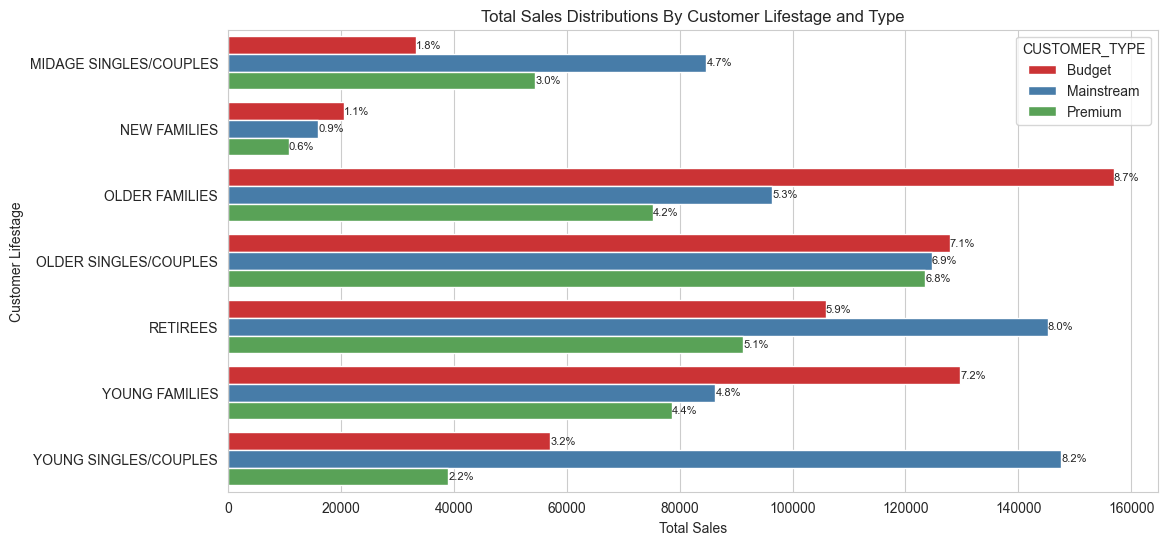

In [27]:
# Compute the total sales
total_sales = df['TOT_SALES'].sum()

# Group the data by lifestage and premium customer and compute the total sales
total_sales_breakdown = df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()
total_sales_breakdown.columns = ['LIFESTAGE', 'CUSTOMER_TYPE','TOT_SALES']
# Compute the percentage of total sales for each lifestage and premium customer
total_sales_breakdown['PERCENT'] = total_sales_breakdown['TOT_SALES'] * 100 / total_sales

# Plot the data as a stacked horizontal bar chart
sns.set_style('whitegrid')
sns.set_palette('Set1')

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=total_sales_breakdown, x='TOT_SALES', y='LIFESTAGE', hue='CUSTOMER_TYPE', orient='h')
plt.xlabel('Total Sales')
plt.ylabel('Customer Lifestage')

# Add percentage labels inside the bars
for p in ax.containers:
    ax.bar_label(p, labels=[f'{(v.get_width()/total_sales*100):.1f}%' for v in p], label_type='edge', fontsize=8)

plt.title('Total Sales Distributions By Customer Lifestage and Type')
plt.show()

- Budget - Older families, Mainstream - Retirees and Young Singles/Couples purchased the most amount of chips. 
- But this may be influenced by number of customers in each segment. We can explore this as below:

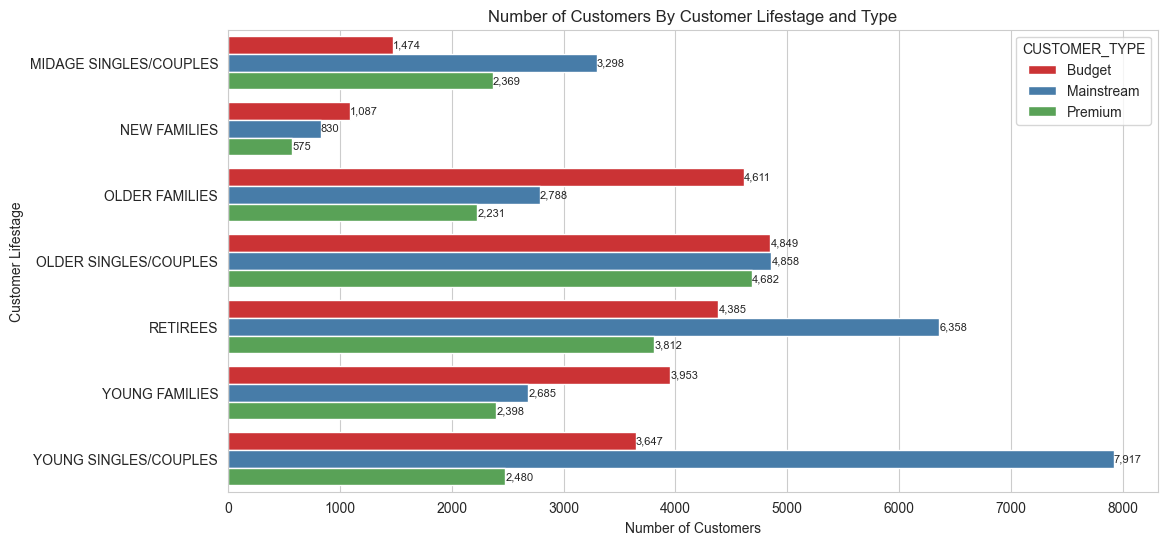

In [28]:
# Find number of customers in each segment
num_customers = df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index()
num_customers.columns = ['LIFESTAGE', 'CUSTOMER_TYPE', 'NO_OF_CUSTOMERS']

# Plot the data as a stacked horizontal bar chart
sns.set_style('whitegrid')
sns.set_palette('Set1')

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=num_customers, x='NO_OF_CUSTOMERS', y='LIFESTAGE', hue='CUSTOMER_TYPE', orient='h')
plt.xlabel('Number of Customers')
plt.ylabel('Customer Lifestage')

# Add number of customers as labels 
for p in ax.containers:
    ax.bar_label(p, labels=[f'{int(v.get_width()):,}' for v in p], label_type='edge', fontsize=8)

plt.title('Number of Customers By Customer Lifestage and Type')
plt.show()

- Mainstream - Retirees and Young Singles/Couples have significantly more customers so these results greatly influenced the purchases
- Higher sales may also be driven by more units of chips being bought per customer. How many chips are bought per customer by segment? 

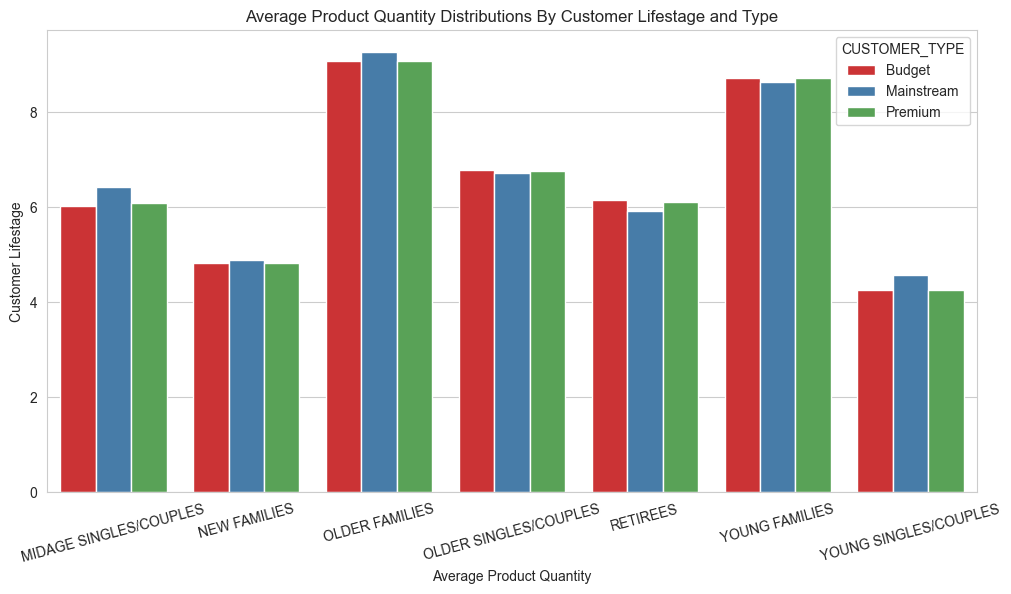

In [29]:
# Average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER
chips_per_customer = (df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].sum()/df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique()).reset_index()
chips_per_customer.columns = ['LIFESTAGE', 'CUSTOMER_TYPE', 'AVG_CHIPS_PER_CUSTOMER']

# Plot our horizontal bars
sns.set_style('whitegrid')
sns.set_palette('Set1')
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=chips_per_customer, y='AVG_CHIPS_PER_CUSTOMER', x='LIFESTAGE', hue='CUSTOMER_TYPE')
plt.xlabel('Average Product Quantity')
plt.xticks(rotation=15)
plt.ylabel('Customer Lifestage')
plt.title('Average Product Quantity Distributions By Customer Lifestage and Type')
plt.show()

In [30]:
# Older families and young families spend more on chips than other lifestages
# Let's also investigate the average price per unit chips bought for each customer segment as this is also a driver of total sales.

C:\Users\duong\AppData\Local\Temp\ipykernel_9760\1261523134.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_chip_price = df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES', 'PROD_QTY'].sum()


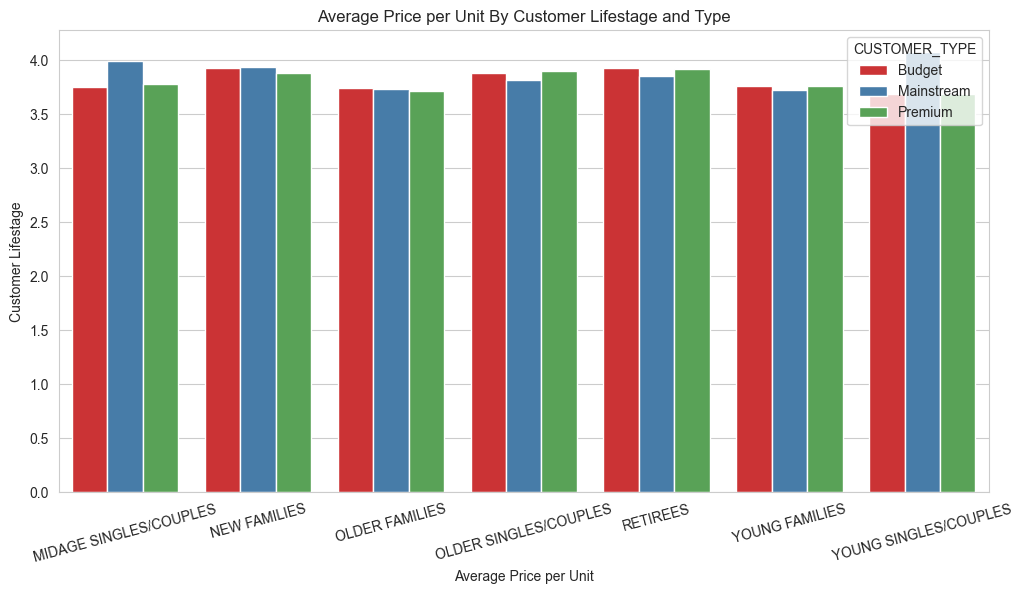

In [31]:
# Average price per unit by LIFESTAGE and PREMIUM_CUSTOMER
avg_chip_price = df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES', 'PROD_QTY'].sum()
avg_chip_price['AVG_CHIP_PRICE'] = avg_chip_price['TOT_SALES'] / avg_chip_price['PROD_QTY']
avg_chip_price.reset_index(inplace=True)
avg_chip_price.columns = ['LIFESTAGE', 'CUSTOMER_TYPE','TOT_SALES', 'PROD_QTY','AVG_CHIP_PRICE']
# Plot our horizontal bars
sns.set_style('whitegrid')
sns.set_palette('Set1')
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=avg_chip_price, y='AVG_CHIP_PRICE', x='LIFESTAGE', hue='CUSTOMER_TYPE')
plt.xlabel('Average Price per Unit')
plt.xticks(rotation=15)
plt.ylabel('Customer Lifestage')
plt.title('Average Price per Unit By Customer Lifestage and Type')
plt.show()

In [32]:
# Mainstream midage and young singles and couples are more willing to pay more per packet of chips compared to their budget and premium counterparts. This is because premium shoppers only buy for entertainment purposes, not for regular consumption.
# This is also supported by there being fewer premium midage and young singles and ouples buying chips compared to their mainstream counterparts.

# As the difference in average price per unit isn't large, we can check if this difference is statistically different using t-test 
# btw mainstream vs premium and budget midage and young singles and couples

In [33]:
import scipy.stats as stats

# Create a column UNIT_PRICE in our main dataframe and rename PREMIUM_CUSTOMER to CUSTOMER_TYPE
df['UNIT_PRICE'] = df['TOT_SALES']/df['PROD_QTY']
df.columns = ['LYLTY_CARD_NBR','LIFESTAGE','CUSTOMER_TYPE','DATE','STORE_NBR','TXN_ID','PROD_NBR',
                'PROD_NAME','PROD_QTY','TOT_SALES','PACK_SIZE','BRAND_NAME','UNIT_PRICE']
# T-test for mainstream vs premium and budget
mainstream = df[(df['CUSTOMER_TYPE'] == 'Mainstream') & 
            ((df['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') | (df['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES'))]['UNIT_PRICE']
premium_budget = df[((df['CUSTOMER_TYPE'] == 'Premium') | (df['CUSTOMER_TYPE'] == 'Budget')) & 
                ((df['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') | (df['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES'))]['UNIT_PRICE']

t_value, p_value = stats.ttest_ind(mainstream, premium_budget)

print(f"Mainstream vs Premium/Budget t-value: {t_value:.5f}, p-value: {p_value:.5f}")


Mainstream vs Premium/Budget t-value: 37.83196, p-value: 0.00000


In [34]:
# A t-value of 37.83 indicates a large difference in the average chip prices between the Mainstream and Premium/Budget customer segments 
# being compared. The p-value of 0.00000 suggests that there is a statistically significant difference between the two customer segments 
# with respect to the average chip prices.

# In simpler terms, this means that the average chip prices of the Mainstream and Premium/Budget customer segments being compared are 
# significantly different. It's important to note that a low p-value doesn't necessarily mean that the difference is practically significant 
# or important in real-world terms, so further analysis may be required to assess the practical significance of the observed difference.

DEEP DIVE INTO SPECIFIC CUSTOMER SEGMENTS FOR INSIGHTS [specifically Mainstream: Young Singles/Couples]

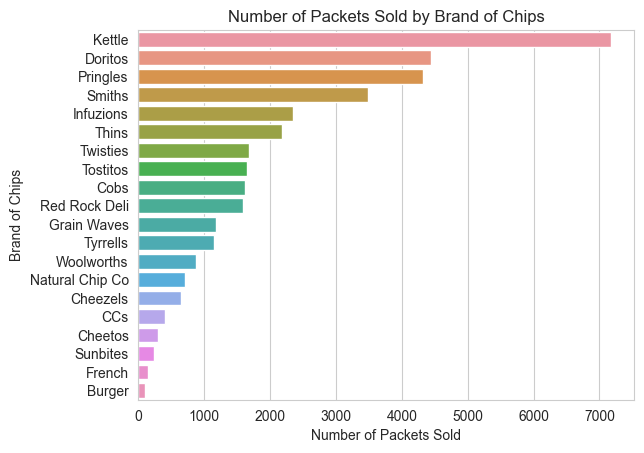

In [35]:
# Extract data for mainstream young singles/couples
young_mainstream = df[(df['CUSTOMER_TYPE'] == 'Mainstream') &  (df['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES')]
brand_data = young_mainstream.groupby('BRAND_NAME')['PROD_QTY'].sum().reset_index().sort_values(by='PROD_QTY',ascending=False)
# Plot to see which brands are the most famous among this customer segment
sns.barplot(data=brand_data, y='BRAND_NAME', x='PROD_QTY')
plt.xlabel('Number of Packets Sold')
plt.ylabel('Brand of Chips')
plt.title('Number of Packets Sold by Brand of Chips')
plt.show()

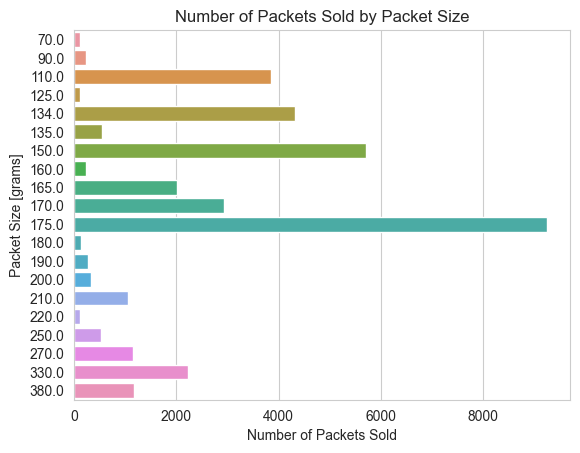

In [36]:
# Kettle and Doritos are the most sold chip brands among our customer segment. We can also check the specific popular packet sizes too
size_data = young_mainstream.groupby('PACK_SIZE')['PROD_QTY'].sum().reset_index().sort_values(by='PROD_QTY',ascending=False)
# Plot to see which sizes are the most famous among this customer segment
sns.barplot(data=size_data, y='PACK_SIZE', x='PROD_QTY', orient='h')
plt.xlabel('Number of Packets Sold')
plt.ylabel('Packet Size [grams]')
plt.title('Number of Packets Sold by Packet Size')
plt.show()

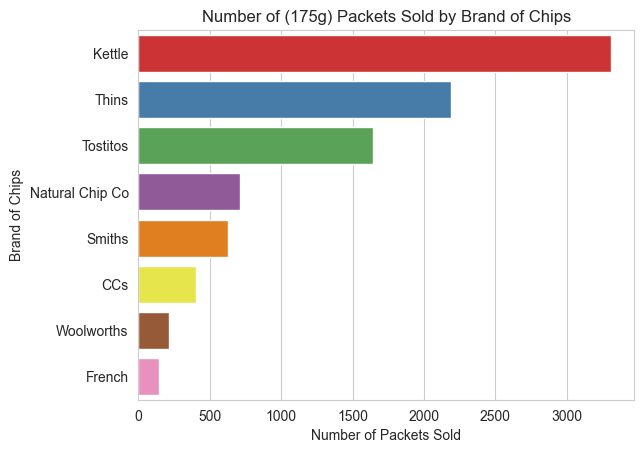

In [37]:
# 175 grams packet size is the most preferred. Let's check our top 5 popular brands with the size of 175 grams
top5_brand = young_mainstream[young_mainstream['PACK_SIZE']==175].groupby('BRAND_NAME')['PROD_QTY'].sum().reset_index().sort_values(by='PROD_QTY',ascending=False)
# Plot to see which brands of 175 grams are the most famous among this customer segment
sns.barplot(data=top5_brand, y='BRAND_NAME', x='PROD_QTY')
plt.xlabel('Number of Packets Sold')
plt.ylabel('Brand of Chips')
plt.title('Number of (175g) Packets Sold by Brand of Chips')
plt.show()